# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [1]:
id1 = "332391820"
id2 = "313475808"

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [36]:
df = pd.DataFrame([id1])

Uncomment in case two students are doing the assignment together:

In [37]:
#df = pd.DataFrame([id1,id2])

In [38]:
df.to_clipboard(index=False,header=False)

---

----

In [39]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
len(data)

18249

In [40]:
data.dtypes


Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Q1 

In [41]:
data["Date"]=pd.to_datetime(data.Date) 
data["month"]=pd.DatetimeIndex(data.Date).month #add column month
data["year"]=pd.DatetimeIndex(data.Date).year #add column year

data.pivot_table("total_sold",index="region",columns="year") # make sum of avocado that have been sold in each region for each year

year,2015,2016,2017,2018
region,,,,
Albany,3.874900e+04,5.061861e+04,4.935455e+04,6.424942e+04
Atlanta,2.233817e+05,2.723738e+05,2.718408e+05,3.429759e+05
BaltimoreWashington,3.908229e+05,3.932096e+05,3.869399e+05,5.066210e+05
Boise,3.638805e+04,4.474528e+04,4.491096e+04,5.061498e+04
Boston,2.639903e+05,2.939550e+05,2.887799e+05,3.598752e+05
BuffaloRochester,5.666572e+04,6.927992e+04,7.302175e+04,8.849242e+04
California,2.898148e+06,3.136427e+06,2.996646e+06,3.489221e+06
Charlotte,9.122446e+04,1.017954e+05,1.122226e+05,1.494121e+05
Chicago,3.989877e+05,3.808907e+05,3.866109e+05,4.839263e+05


# Q2

In [42]:
new_data=data[(data["region"].str.contains("NewYork")) & (data["year"]==2016)] #create new dataframde with region NewYork and year 2016 (New york like "n" of "Noam")
print("In the new_data there is: ",len(new_data), " lines.") #print len of the new dataframe
new_data.head()

In the new_data there is:  104  lines.


,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
4264,0,2016-12-25,1.36,1087984.90,11329.85,713042.43,84414.47,279198.15,241335.64,36654.59,1207.92,conventional,2016,NewYork,12
4265,1,2016-12-18,1.26,1241381.71,14178.17,954802.60,15428.57,256972.37,215851.19,39174.98,1946.20,conventional,2016,NewYork,12
4266,2,2016-11-12,1.32,1163696.14,10994.77,793989.54,5247.11,353464.72,247566.16,104392.33,1506.23,conventional,2016,NewYork,11
4267,3,2016-04-12,1.52,960475.67,13893.11,696042.02,2350.43,248190.11,214068.14,33668.33,453.64,conventional,2016,NewYork,4
4268,4,2016-11-27,1.56,970753.07,15264.26,696848.85,2022.90,256617.06,223707.17,32610.95,298.94,conventional,2016,NewYork,11


# Q3

In [43]:
print("In the new_data the average of avocado sold is: ", new_data["total_sold"].mean())
# make mean of the column "total_sold" on the new dataframe

In the new_data the average of avocado sold is:  687947.7224999997


# Q4

In [44]:
month9=new_data[new_data["month"]==9]
print("The total bags tha have been sold in september is: ",month9["Total Bags"].sum()) #sum of "total bags" in september

The total bags tha have been sold in september is:  1187689.5


# Q5

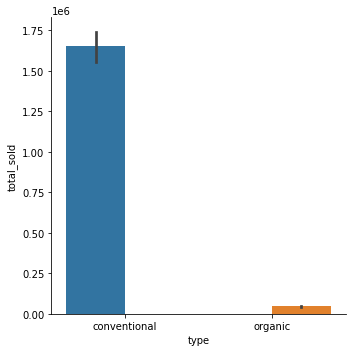

In [45]:
sns.catplot(x="type", y="total_sold", hue="type", kind="bar",data=data) #make a visualization of "total sold" with the different type of avocados



# Q6

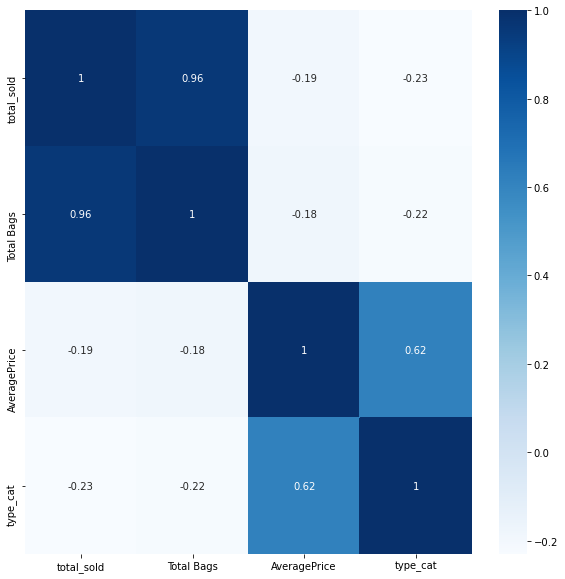

In [46]:
data["type_cat"]=data["type"].astype("category").cat.codes #make "type" to category
features = ['total_sold', 'Total Bags', 'AveragePrice', 'type_cat']


correlation=data[features].corr().round(2) #correlation with the features
plt.figure(1, figsize=(10,10))
sns.heatmap(data=correlation, cmap="Blues", annot=True)

# continue here

# Q7

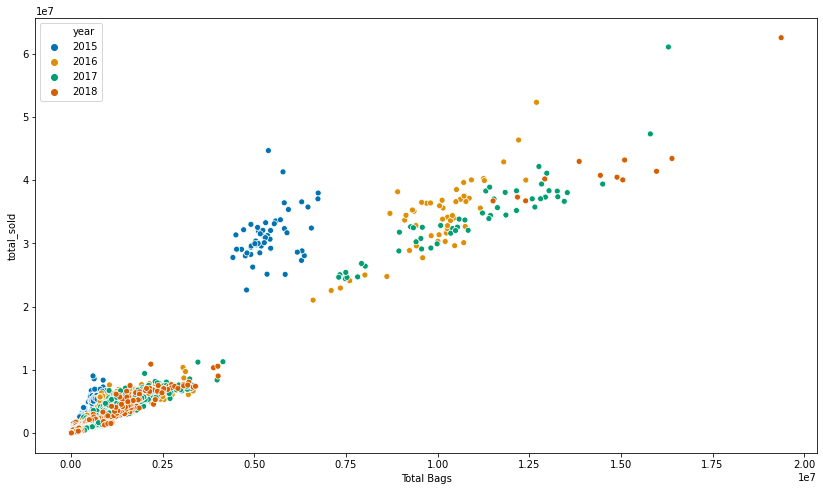

In [47]:
plt.figure(1,figsize=(14,8))
sns.scatterplot(data=data, x='Total Bags',y='total_sold',hue="year",palette="colorblind")
#make a scatterplot with the highest correlation that we found on the last question in each year


---
# GOOD LUCK !!!!
---

## Q8

In [48]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
total_sold      0
small_sold      0
large_sold      0
sma             0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
type_cat        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001391787A310>]],
      dtype=object)

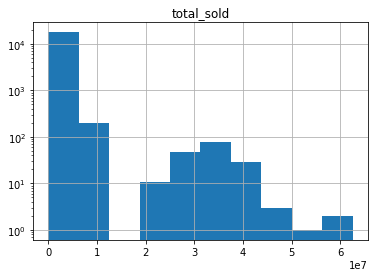

In [49]:
data.hist("total_sold",log=True)

In [50]:
data.pivot_table("AveragePrice",index="year",columns="type")

type,conventional,organic
year,,
2015,1.077963,1.673324
2016,1.105595,1.571684
2017,1.294888,1.735521
2018,1.127886,1.567176


In [56]:
data["region_cat"]=data["region"].astype("category").cat.codes
data["type_cat"]=data["type"].astype("category").cat.codes
features=["region_cat","type_cat","AveragePrice","Total Bags"]
x=data[features]
y=data["total_sold"]

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.3, random_state=1) 
model=model = DecisionTreeRegressor(random_state=1)

model.fit(X_train,y_train)
prediction=model.predict(X_test)
df=pd.DataFrame(columns=["total_sold","prediction"])
df["prediction"]=list(prediction)
df["total_sold"]=y_test
mse(df["prediction"],y_test,squared=False)
y_test

571531.7486135387